# Can We Predict Political Stability Through Use of Global Sustainability Goal Indicators? 

In 2015, all UN Member States developed a set of 17 Global Sustainability Goals to allow for peace and prosperity globally.  The set of goals include those to reduce poverity and inequality, improve health and education, increase economic growth, increase access to clean water and food, and do so in a manner that protects the land and oceans.  

Climate change induced floods and droughts, poverity, and lack of access to clean water and food all contribute to political tension and violence as people struggle to meet their basic needs.  The goal of this project is to see how well the country status of each sustainable development goal can be used to predict the political stability and absence of violence for each country. 

The Sustainability Goals data were obtained from World Bank:https://api.worldbank.org/v2/sources/46/indicators
Documentation on the Sustainability Goals can be found here: https://datatopics.worldbank.org/sdgatlas/
The Worldwide Governance Indicators data were obtaiend from World Bank: https://datacatalog.worldbank.org/dataset/worldwide-governance-indicators.  Details on the selected variables from each dataset can be found below. 



## Get Response Variable: Political Stability and Absence of Violence/Terrorism

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import datetime
import wbdata
import plotly.express as px
import plotly.io as pio
import requests

In [2]:
# Requesting the indicators for the topic Political Stability. The 3 is the key for the Political Stability Data.
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=3")
indicatorsJSON = indicators.json()

In [3]:
# Get all Worldwide Governance indicators so we know what is available
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=3&per_page=500")
indicatorsJSON = indicators.json()
#print(indicatorsJSON) # to view ALL of the indicators as is, remove the "#" at the beginning of the print command

# Parse through the response to see the Indicator IDs and Names
for i in indicatorsJSON[1]:
    IDSindicators = (i["id"],i["name"])
    print(IDSindicators) # to view the indicator ids and names, remove the "#" at the beginning of the print command

('CC.EST', 'Control of Corruption: Estimate')
('CC.NO.SRC', 'Control of Corruption: Number of Sources')
('CC.PER.RNK', 'Control of Corruption: Percentile Rank')
('CC.PER.RNK.LOWER', 'Control of Corruption: Percentile Rank, Lower Bound of 90% Confidence Interval')
('CC.PER.RNK.UPPER', 'Control of Corruption: Percentile Rank, Upper Bound of 90% Confidence Interval')
('CC.STD.ERR', 'Control of Corruption: Standard Error')
('GE.EST', 'Government Effectiveness: Estimate')
('GE.NO.SRC', 'Government Effectiveness: Number of Sources')
('GE.PER.RNK', 'Government Effectiveness: Percentile Rank')
('GE.PER.RNK.LOWER', 'Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval')
('GE.PER.RNK.UPPER', 'Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval')
('GE.STD.ERR', 'Government Effectiveness: Standard Error')
('PV.EST', 'Political Stability and Absence of Violence/Terrorism: Estimate')
('PV.NO.SRC', 'Political Stability and Absence of Violence

In [4]:
# Use the indicator code to define the "indicator" variable.  We can change this to get information on each of the indicators.
indicator = "PV.EST"

# Parse through the response to get the "sourceNote" or definition for the desired indicator
for dict_entity in indicatorsJSON[1]:
    if dict_entity["id"] == indicator:
        print(dict_entity["sourceNote"])
    else:
        pass

Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.


In [5]:
#Get a list of all the location abbreviations so we know what they are for limiting selections.
dlocations = requests.get("http://api.worldbank.org/v2/sources/3/country?per_page=300&format=JSON")
dlocationsJSON = dlocations.json()

# Parse through the response to see the location IDs and names
dlocations = dlocationsJSON["source"][0]["concept"][0]["variable"]
listLen = int(len(dlocations))

# Create dataframe with location values
df = pd.DataFrame(columns=["id", "country"])     
for i in range(0,listLen):
    code = dlocations[i]["id"]
    name = dlocations[i]["value"]
    df = df.append({"id":code, "country":name}, ignore_index = True)
dlocationsList = df

# See first few items in the dataframe
dlocationsList.head()

,id,country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALB,Albania


In [6]:
#Select the indicator, location, and time you would like for the API call
# Selecting the indicator
indicatorSelection = {'PV.EST':'Political Stability and Absence of Violence/Terrorism: Estimate',
                     'PV.STD.ERR': 'Political Stability and Absence of Violence/Terrorism: Standard Error'}
# Select the countries or regions
locationSelection = ["all"]
# Selecting the time frame
timeSelection = (datetime.datetime(2010, 1, 1), datetime.datetime(2020, 12, 31))
#Set the source id number for the Worldwide Governance Data
source_id=3

In [7]:
# Make the API call and assign the resulting DataFrame to "PT_data"
#Notes from wbdata: 
"""
    Convenience function to download a set of indicators and  merge them into a
        pandas DataFrame.  The index will be the same as if calls were made to
        get_data separately.
    :indicators: A dictionary where the keys are desired indicators and the
        values are the desired column names
    :country: a country code, sequence of country codes, or "all" (default)
    :data_date: the desired date as a datetime object or a 2-sequence with
        start and end dates
    :freq: the desired periodicity of the data, one of 'Y' (yearly), 'M'
        (monthly), or 'Q' (quarterly). The indicator may or may not support the
        specified frequency.
    :source: the specific source to retrieve data from (defaults on API to 2,
        World Development Indicators)
    :convert_date: if True, convert date field to a datetime.datetime object.
    :keep_levels: if True don't reduce the number of index levels returned if
        only getting one date or country
    :cache: use the cache
    :returns: a WBDataFrame
    """
PT_data = wbdata.get_dataframe(indicatorSelection,
                            source=source_id,
                            country = locationSelection, 
                            data_date = timeSelection, 
                            convert_date = False)

In [8]:
PT_data.head()

Political Stability and Absence of Violence/Terrorism: Estimate  \
country     date                                                                    
Afghanistan 2019                                          -2.649407                 
            2018                                          -2.751611                 
            2017                                          -2.800609                 
            2016                                          -2.671054                 
            2015                                          -2.571222                 

                  Political Stability and Absence of Violence/Terrorism: Standard Error  
country     date                                                                         
Afghanistan 2019                                           0.241833                      
            2018                                           0.226781                      
            2017                                           0.227994                      
            2016                                           0.219708                      
            2015                                           0.215604

In [9]:
# Turn multiindex into columns
PT_data.reset_index(inplace=True)  
PT_data.head()

,country,date,Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Standard Error
0,Afghanistan,2019,-2.649407,0.241833
1,Afghanistan,2018,-2.751611,0.226781
2,Afghanistan,2017,-2.800609,0.227994
3,Afghanistan,2016,-2.671054,0.219708
4,Afghanistan,2015,-2.571222,0.215604


In [10]:
#Merge Political Stability data with dlocationsList to get the ISO code for each country
PT_data_with_loc = pd.merge(dlocationsList, PT_data, on='country')
PT_data_with_loc.head(-1)

,id,country,date,Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Standard Error
0,ABW,Aruba,2019,1.357372,0.271196
1,ABW,Aruba,2018,1.362981,0.251480
2,ABW,Aruba,2017,1.334757,0.254837
3,ABW,Aruba,2016,1.284199,0.244329
4,ABW,Aruba,2015,1.230921,0.241163
...,...,...,...,...,...
2134,ZWE,Zimbabwe,2015,-0.618156,0.202983
2135,ZWE,Zimbabwe,2014,-0.713570,0.196386
2136,ZWE,Zimbabwe,2013,-0.665950,0.228020
2137,ZWE,Zimbabwe,2012,-0.778662,0.221984


In [11]:
#make fucntion to get lat and lon of each country for plotting from country code
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="http")

def get_lat(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.latitude
    except:
        # Return missing value
        return np.nan
    
def get_lon(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.longitude
    except:
        # Return missing value
        return np.nan

In [12]:
# Remove countries with no Political tension data
PT_data_with_loc.dropna(axis=0, inplace=True)
PT_data_with_loc.head()

,id,country,date,Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Standard Error
0,ABW,Aruba,2019,1.357372,0.271196
1,ABW,Aruba,2018,1.362981,0.251480
2,ABW,Aruba,2017,1.334757,0.254837
3,ABW,Aruba,2016,1.284199,0.244329
4,ABW,Aruba,2015,1.230921,0.241163


In [13]:
#get length of the dataset
len(PT_data_with_loc)

2114

In [72]:
# Make a new dataframe storing the country name, country code, lat and lon for each country to use with other datasets
country_data = PT_data_with_loc.drop(['Political Stability and Absence of Violence/Terrorism: Estimate', 'Political Stability and Absence of Violence/Terrorism: Standard Error'], axis=1)
country_df = country_data.drop('date', axis=1)
country_df.drop_duplicates(['country'], inplace=True)

In [73]:
len(country_df)

214

In [74]:
#Get Lat lon of each country based on id using function above.

country_df['lat'] = country_df.apply(lambda row : get_lat(row['country']), axis=1)
country_df['lon'] = country_df.apply(lambda row : get_lon(row['country']), axis=1)

country_df.head()

,id,country,lat,lon
0,ABW,Aruba,12.490300,-69.960984
10,AFG,Afghanistan,33.768006,66.238514
20,AGO,Angola,-11.877577,17.569124
30,AIA,Anguilla,18.195495,-63.075023
40,ALB,Albania,41.000028,19.999962


In [75]:
#Remove any countries with nan values for lat or lon
country_df.dropna(axis=0, inplace=True)
country_df.head()

,id,country,lat,lon
0,ABW,Aruba,12.490300,-69.960984
10,AFG,Afghanistan,33.768006,66.238514
20,AGO,Angola,-11.877577,17.569124
30,AIA,Anguilla,18.195495,-63.075023
40,ALB,Albania,41.000028,19.999962


In [80]:
#merge country_df and co2_data now that we have lat lon for each country
PT_new_df = pd.merge(PT_data_with_loc, country_df, on='country')
PT_new_df.head()

,id_x,country,date,Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Standard Error,id_y,lat,lon
0,ABW,Aruba,2019,1.357372,0.271196,ABW,12.4903,-69.960984
1,ABW,Aruba,2018,1.362981,0.251480,ABW,12.4903,-69.960984
2,ABW,Aruba,2017,1.334757,0.254837,ABW,12.4903,-69.960984
3,ABW,Aruba,2016,1.284199,0.244329,ABW,12.4903,-69.960984
4,ABW,Aruba,2015,1.230921,0.241163,ABW,12.4903,-69.960984


In [81]:
#remove extra id column
PT_new_df.drop('id_y', axis=1, inplace=True)
PT_new_df.head()

,id_x,country,date,Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Standard Error,lat,lon
0,ABW,Aruba,2019,1.357372,0.271196,12.4903,-69.960984
1,ABW,Aruba,2018,1.362981,0.251480,12.4903,-69.960984
2,ABW,Aruba,2017,1.334757,0.254837,12.4903,-69.960984
3,ABW,Aruba,2016,1.284199,0.244329,12.4903,-69.960984
4,ABW,Aruba,2015,1.230921,0.241163,12.4903,-69.960984


In [86]:
#Change df column names for easier processing
PT_new_df.rename(columns={"Political Stability and Absence of Violence/Terrorism: Estimate": "Political_Stability", "Political Stability and Absence of Violence/Terrorism: Standard Error": "Political_Stability_SE", "id_x": "id"}, inplace=True)
PT_new_df.head()

,id,country,date,Political_Stability,Political_Stability_SE,lat,lon
0,ABW,Aruba,2019,1.357372,0.271196,12.4903,-69.960984
1,ABW,Aruba,2018,1.362981,0.251480,12.4903,-69.960984
2,ABW,Aruba,2017,1.334757,0.254837,12.4903,-69.960984
3,ABW,Aruba,2016,1.284199,0.244329,12.4903,-69.960984
4,ABW,Aruba,2015,1.230921,0.241163,12.4903,-69.960984


In [21]:
grouped_PT_df = PT_new_df.groupby('country').mean().reset_index()
grouped_PT_df[grouped_PT_df['country']=='United States']

,country,Political_Stability,Political Stability and Absence of Violence/Terrorism: Standard Error_x,Political Stability and Absence of Violence/Terrorism: Standard Error_y,lat,lon
196,United States,0.507555,0.216898,0.227832,39.78373,-100.445883


/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


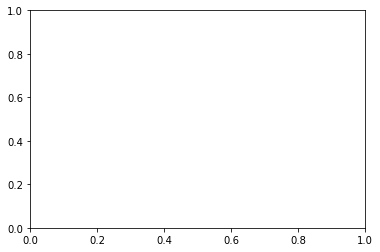

ValueError: need at least one array to concatenate

<Figure size 864x648 with 2 Axes>

In [22]:
import matplotlib.pyplot as plt

#plot political tension data on worldmap using geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
from shapely.geometry import Point, LineString

fig, ax = plt.subplots()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
grouped_PT_df.plot(ax=world.plot(figsize=(12,9)), kind="scatter", x="lon", y="lat",
    s=grouped_PT_df['Political_Stability'], label="Political Stability and Absence of Violence",
    c="Political_Stability", cmap='YlOrRd',
    colorbar=True, alpha=0.4)
plt.legend()
plt.show()

In [23]:
#https://stackoverflow.com/questions/61460814/color-cartopy-map-countries-according-to-given-values

In [24]:
grouped_PT_df.sort_values('Political_Stability', ascending=False)

,country,Political_Stability,Political Stability and Absence of Violence/Terrorism: Standard Error_x,Political Stability and Absence of Violence/Terrorism: Standard Error_y,lat,lon
71,Greenland,1.903959,0.382400,0.351759,77.619235,-42.812597
105,Liechtenstein,1.480630,0.269135,0.254955,47.141631,9.553153
132,New Zealand,1.457606,0.216898,0.227832,-41.500083,172.834408
91,"Jersey, Channel Islands",1.399630,0.485580,0.472698,49.185217,-2.109048
163,Singapore,1.374209,0.216898,0.227832,1.290475,103.852036
...,...,...,...,...,...,...
85,Iraq,-2.247403,0.231976,0.239387,33.095579,44.174978
179,Syrian Arab Republic,-2.490038,0.229933,0.245477,34.640186,39.049411
140,Pakistan,-2.504352,0.220594,0.233699,30.330840,71.247499
0,Afghanistan,-2.587409,0.238639,0.241833,33.768007,66.238514


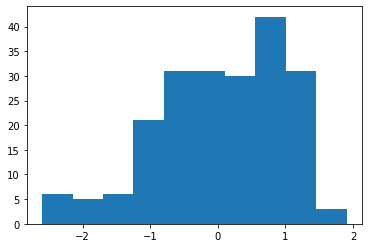

In [25]:
#Show a histogram of 5-year mean political stability. 
plt.hist(x="Political_Stability", data=grouped_PT_df)
plt.show()

# Get Predictor Variables from Sustainability Goals Dataset

In [26]:
# Requesting the indicators for the topic Political Stability.  The 46 is the key for the Political Stability Data.
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=46")
indicatorsJSON = indicators.json()

In [27]:
# Get all Sustainable Development Variables so we know what is available
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=46&per_page=500")
indicatorsJSON = indicators.json()
#print(indicatorsJSON) # to view ALL of the indicators as is, remove the "#" at the beginning of the print command

# Parse through the response to see the Indicator IDs and Names
for i in indicatorsJSON[1]:
    IDSindicators = (i["id"],i["name"])
    print(IDSindicators) # to view the indicator ids and names, remove the "#" at the beginning of the print command

('AG.LND.FRST.K2', 'Forest area (sq. km)')
('AG.LND.FRST.ZS', 'Forest area (% of land area)')
('AG.YLD.CREL.KG', 'Cereal yield (kg per hectare)')
('BN.CAB.XOKA.GD.ZS', 'Current account balance (% of GDP)')
('BN.KLT.PTXL.CD', 'Portfolio Investment, net (BoP, current US$)')
('BX.KLT.DINV.CD.WD', 'Foreign direct investment, net inflows (BoP, current US$)')
('BX.KLT.DINV.WD.GD.ZS', 'Foreign direct investment, net inflows (% of GDP)')
('BX.TRF.PWKR.DT.GD.ZS', 'Personal remittances, received (% of GDP)')
('DT.DOD.DECT.GN.ZS', 'External debt stocks (% of GNI)')
('DT.ODA.ALLD.CD', 'Net official development assistance and official aid received (current US$)')
('DT.ODA.ODAT.CD', 'Net official development assistance received (current US$)')
('DT.ODA.ODAT.CD1', 'Net official development assistance received (current US$)')
('DT.ODA.ODAT.KD', 'Net official development assistance received (constant 2018 US$)')
('DT.TDS.DPPF.XP.ZS', 'Debt service (PPG and IMF only, % of exports of goods, services and 

In [28]:
# Use the indicator code to define the "indicator" variable.  We can change this to get information on each of the indicators.
indicator = "SH.SVR.WAST.FE.ZS"

# Parse through the response to get the "sourceNote" or definition for the desired indicator
for dict_entity in indicatorsJSON[1]:
    if dict_entity["id"] == indicator:
        print(dict_entity["sourceNote"])
    else:
        pass

Prevalence of severe wasting, female, is the proportion of girls under age 5 whose weight for height is more than three standard deviations below the median for the international reference population ages 0-59.


In [29]:
#Get a list of all the location abbreviations from the sustainable development dataset so we know what they are for limiting selections.
dlocations = requests.get("http://api.worldbank.org/v2/sources/46/country?per_page=300&format=JSON")
dlocationsJSON = dlocations.json()

# Parse through the response to see the location IDs and names
dlocations = dlocationsJSON["source"][0]["concept"][0]["variable"]
listLen = int(len(dlocations))

# Create dataframe with location values
df = pd.DataFrame(columns=["id", "country"])     
for i in range(0,listLen):
    code = dlocations[i]["id"]
    name = dlocations[i]["value"]
    df = df.append({"id":code, "country":name}, ignore_index = True)
dlocationsList = df

# See first few items in the dataframe
dlocationsList.head()

,id,country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,ALB,Albania
4,AND,Andorra


In [30]:
#Set a list of all the predictor variables that we want to use from the dataset. 
predictor_variables = []

In [31]:
#Select the indicator, location, and time you would like for the API call
# Selecting the indicator
#indicatorSelection = {"EN.ATM.CO2E.PC":"CO2 emissions (metric tons per capita)"}
indicatorSelection = {'AG.LND.FRST.ZS':'Forest area (% of land area)', 
                      'AG.YLD.CREL.KG':'Cereal yield (kg per hectare)',
                      'BN.CAB.XOKA.GD.ZS':'Current account balance (% of GDP)', 
                      'BX.KLT.DINV.WD.GD.ZS':'Foreign direct investment, net inflows (% of GDP)',
                      'DT.ODA.ALLD.CD':'Net official development assistance and official aid received (current US$)',
                      'EG.CFT.ACCS.ZS':'Access to clean fuels and technologies for cooking (% of population)',
                      'EG.ELC.ACCS.ZS':'Access to electricity (% of population)',
                      'EG.ELC.RNEW.ZS':'Renewable electricity output (% of total electricity output)',
                      'EN.ATM.CO2E.PC':'CO2 emissions (metric tons per capita)',
                      'EN.ATM.PM25.MC.ZS':'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)',
                      'EN.MAM.THRD.NO':'Mammal species, threatened',
                      'EN.POP.SLUM.UR.ZS':'Population living in slums (% of urban population)',
                      'ER.H2O.FWST.ZS':'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources',
                      'ER.H2O.INTR.PC':'Renewable internal freshwater resources per capita (cubic meters)',
                      'ER.LND.PTLD.ZS':'Terrestrial protected areas (% of total land area)',
                      'FB.CBK.BRCH.P5':'Commercial bank branches (per 100,000 adults)',
                      'FM.LBL.BMNY.ZG':'Broad money growth (annual %)',
                      'FP.CPI.TOTL.ZG':'Inflation, consumer prices (annual %)',
                      'FX.OWN.TOTL.ZS':'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
                      'FX.OWN.TOTL.FE.ZS':'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
                      'GB.XPD.RSDV.GD.ZS':'Research and development expenditure (% of GDP)',
                      'GC.TAX.TOTL.GD.ZS':'Tax revenue (% of GDP)',
                      'IC.BUS.NDNS.ZS':'New business density (new registrations per 1,000 people ages 15-64)',
                      'IE.PPI.ENGY.CD':'Investment in energy with private participation (current US$)',
                      'IE.PPI.WATR.CD':'Investment in water and sanitation with private participation (current US$)',
                      'IT.NET.USER.ZS':'Individuals using the Internet (% of population)',
                      'NE.EXP.GNFS.KD.ZG':'Exports of goods and services (annual % growth)',
                      'NE.EXP.GNFS.ZS':'Exports of goods and services (% of GDP)',
                      'NE.IMP.GNFS.KD.ZG':'Imports of goods and services (annual % growth)',
                      'NY.GDP.MKTP.CD':'GDP (current US$)',
                      'NY.GDP.MKTP.KD.ZG':'GDP growth (annual %)',
                      'NY.GDP.PCAP.CD':'GDP per capita (current US$)',
                      'NY.GDP.PCAP.KD.ZG':'GDP per capita growth (annual %)',
                      'SE.ADT.1524.LT.FE.ZS':'Literacy rate, youth female (% of females ages 15-24)',
                      'SE.ADT.LITR.ZS':'Literacy rate, adult total (% of people ages 15 and above)',
                      'SE.PRE.ENRR':'School enrollment, preprimary (% gross)',
                      'SE.ENR.PRSC.FM.ZS':'School enrollment, primary and secondary (gross), gender parity index (GPI)',
                      'SE.SEC.CMPT.LO.ZS':'Lower secondary completion rate, total (% of relevant age group)',
                      'SE.SEC.CUAT.PO.FE.ZS':'Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)',
                      'SE.TER.CUAT.BA.ZS':"Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",
                      'SE.SEC.UNER.LO.ZS':'Adolescents out of school (% of lower secondary school age)',
                      'SH.ALC.PCAP.LI':'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                      'SH.ANM.ALLW.ZS':'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
                      'SH.DYN.AIDS.ZS':'Prevalence of HIV, total (% of population ages 15-49)',
                      'SH.DYN.MORT':'Mortality rate, under-5 (per 1,000 live births)',
                      'SH.DYN.NCOM.ZS':'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)',
                      'SH.DYN.NMRT':'Mortality rate, neonatal (per 1,000 live births)',
                      'SH.H2O.BASW.ZS':'People using at least basic drinking water services (% of population)',
                      'SH.H2O.SMDW.ZS':'People using safely managed drinking water services (% of population)',
                      'SH.STA.FGMS.ZS':'Female genital mutilation prevalence (%)',
                      'SH.STA.MALN.ZS':'Prevalence of underweight, weight for age (% of children under 5)',
                      'SH.STA.SUIC.P5':'Suicide mortality rate (per 100,000 population)',
                      'SH.UHC.OOPC.10.ZS':'Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%)',
                      'SL.UEM.TOTL.ZS':'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                      'SN.ITK.MSFI.ZS':'Prevalence of moderate or severe food insecurity in the population (%)',
                      'SP.M18.2024.FE.ZS':'Women who were first married by age 18 (% of women ages 20-24)',
                      'SP.URB.GROW':'Urban population growth (annual %)',
                      'VC.BTL.DETH':'Battle-related deaths (number of people)',
                      'VC.IHR.PSRC.P5':'Intentional homicides (per 100,000 people)'
                       }
# Select the countries or regions
locationSelection = ["all"]
# Selecting the time frame
timeSelection = (datetime.datetime(2010, 1, 1), datetime.datetime(2020, 12, 31))
#Set the source id number for the Worldwide Governance Data
source_id=46

In [32]:
# Make the API call and assign the resulting DataFrame to "DF_data"
#Notes from wbdata: 
"""
    Convenience function to download a set of indicators and  merge them into a
        pandas DataFrame.  The index will be the same as if calls were made to
        get_data separately.
    :indicators: An dictionary where the keys are desired indicators and the
        values are the desired column names
    :country: a country code, sequence of country codes, or "all" (default)
    :data_date: the desired date as a datetime object or a 2-sequence with
        start and end dates
    :freq: the desired periodicity of the data, one of 'Y' (yearly), 'M'
        (monthly), or 'Q' (quarterly). The indicator may or may not support the
        specified frequency.
    :source: the specific source to retrieve data from (defaults on API to 2,
        World Development Indicators)
    :convert_date: if True, convert date field to a datetime.datetime object.
    :keep_levels: if True don't reduce the number of index levels returned if
        only getting one date or country
    :cache: use the cache
    :returns: a WBDataFrame
    """
DF_data = wbdata.get_dataframe(indicatorSelection,
                            source=source_id,
                            country = locationSelection, 
                            data_date = timeSelection, 
                            convert_date = False)

In [33]:
DF_data.head()

Forest area (% of land area)  Cereal yield (kg per hectare)  \
country    date                                                                
Arab World 2019                           NaN                            NaN   
           2018                      2.849036                    2011.461649   
           2017                      2.868595                    1869.677439   
           2016                      2.887384                    1705.274933   
           2015                      2.904999                    2057.438839   

                 Current account balance (% of GDP)  \
country    date                                       
Arab World 2019                                 NaN   
           2018                                 NaN   
           2017                                 NaN   
           2016                                 NaN   
           2015                                 NaN   

                 Foreign direct investment, net inflows (% of GDP)  \
country    date                                                      
Arab World 2019                                           1.278438   
           2018                                           1.258055   
           2017                                           1.230380   
           2016                                           1.360062   
           2015                                           1.043033   

                 Net official development assistance and official aid received (current US$)  \
country    date                                                                                
Arab World 2019                                                NaN                             
           2018                                                NaN                             
           2017                                                NaN                             
           2016                                                NaN                             
           2015                                                NaN                             

                 Access to clean fuels and technologies for cooking (% of population)  \
country    date                                                                         
Arab World 2019                                                NaN                      
           2018                                                NaN                      
           2017                                                NaN                      
           2016                                          84.510733                      
           2015                                          84.171596                      

                 Access to electricity (% of population)  \
country    date                                            
Arab World 2019                                89.512282   
           2018                                88.306324   
           2017                                89.623427   
           2016                                88.504261   
           2015                                87.935479   

                 Renewable electricity output (% of total electricity output)  \
country    date                                                                 
Arab World 2019                                                NaN              
           2018                                                NaN              
           2017                                                NaN              
           2016                                                NaN              
           2015                                           2.920702              

                 CO2 emissions (metric tons per capita)  \
country    date                                           
Arab World 2019                                     NaN   
           2018                                4.438716   
           2017                                4.528351  

# Get Climate Data



In [34]:
import json
import requests

base_url = 'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/'

#set type to monthly average
type= 'mavg'
#set GCM Model
model = 'cccma_cgcm3_1'
#set sres emissions scenario
scenario='a2'
#set var to temperature in degrees Celsius and precipitation in millimeters
var='tas'
#var= ['tas', 'pr']
#set start and end year for the time period we select
start = '1980'
end = '1999'
#set country code using the iso codes from the following website: https://unstats.un.org/unsd/methodology/m49/
ISO3= 'USA'

#create an empty dataframe
climate_df = pd.DataFrame(columns=[])

# List of climate variables we want
vars = ["tas", "pr"]

climate_list = []

# For each variable, access its information through the API call
for var in vars:
    desired_endpoint = type+'/'+var+'/'+start+'/'+end+'/'+ISO3
    req = requests.get(base_url+desired_endpoint).json()
    for x in range(len(req)):

        climate_list.append([req[x]['fromYear'], req[x]['toYear'], req[x]['variable'],
                             req[x]['gcm'], req[x]['monthVals']])
                         
climate_df = pd.DataFrame(climate_list, columns=['fromYear','toYear','variable','gcm','monthVals'])

In [35]:
#view req to see what is available
req

[{'gcm': 'bccr_bcm2_0',
  'variable': 'pr',
  'monthVals': [54.08542875,
   50.10966809,
   59.51437374,
   65.55661286,
   70.43493967,
   68.00114649,
   74.48428044,
   74.43675767,
   76.55364909,
   69.6023086,
   65.11055405,
   57.89741514],
  'fromYear': 1980,
  'toYear': 1999},
 {'gcm': 'cccma_cgcm3_1',
  'variable': 'pr',
  'monthVals': [62.24072027,
   57.24048448,
   60.46462325,
   59.70685447,
   65.48141856,
   67.01421827,
   68.07160133,
   65.0143177,
   66.89814055,
   64.13912761,
   71.3859928,
   70.08152903],
  'fromYear': 1980,
  'toYear': 1999},
 {'gcm': 'cnrm_cm3',
  'variable': 'pr',
  'monthVals': [64.41341328,
   57.52317639,
   70.80296506,
   80.30451778,
   91.53901043,
   92.17370944,
   97.61402443,
   90.73968503,
   86.94435889,
   81.82628371,
   68.19157718,
   66.61348796],
  'fromYear': 1980,
  'toYear': 1999},
 {'gcm': 'csiro_mk3_5',
  'variable': 'pr',
  'monthVals': [69.54382106,
   64.10854116,
   66.03073631,
   57.06770773,
   65.87576136,


In [36]:
#declare empty month lists
January=[]
February=[]
March=[]
April=[]
May=[]
June=[]
July=[]
August=[]
September=[]
October=[]
November=[]
December=[]

#for loop for breaking list of values in monthVals into each seperate month to make into a seperate column based on the month
for x in  range(len(climate_df['monthVals'])):

    monthly_list = climate_df['monthVals'][x]
    
    for y in range(len(monthly_list)):
        if y == 0:
            January.append(climate_df['monthVals'][x][y])         
        if y == 1:
            February.append(climate_df['monthVals'][x][y])       
        if y == 2:
            March.append(climate_df['monthVals'][x][y])    
        if y == 3:
            April.append(climate_df['monthVals'][x][y])      
        if y == 4:
            May.append(climate_df['monthVals'][x][y])    
        if y == 5:
            June.append(climate_df['monthVals'][x][y])    
        if y == 6:
            July.append(climate_df['monthVals'][x][y])    
        if y == 7:
            August.append(climate_df['monthVals'][x][y])    
        if y == 8:
            September.append(climate_df['monthVals'][x][y])      
        if y == 9:
            October.append(climate_df['monthVals'][x][y])      
        if y == 10:
            November.append(climate_df['monthVals'][x][y])    
        if y == 11:
            December.append(climate_df['monthVals'][x][y])  

In [37]:
#write each of the lists to a new column in climate df
climate_df['January'] = January
climate_df['February'] = February
climate_df['March'] = March
climate_df['April'] = April
climate_df['May'] = May
climate_df['June'] = June
climate_df['July'] = July
climate_df['August'] = August
climate_df['September'] = September
climate_df['October'] = October
climate_df['November'] = November
climate_df['December'] = December

In [38]:
climate_df.head(n=20)

,fromYear,toYear,variable,gcm,monthVals,January,February,March,April,May,June,July,August,September,October,November,December
0,1980,1999,tas,bccr_bcm2_0,"[-9.621845312, -8.451683216, -3.776517949, 2.6...",-9.621845,-8.451683,-3.776518,2.673571,9.254254,14.923076,18.226249,17.891722,13.545309,6.414062,-0.960048,-6.717319
1,1980,1999,tas,cccma_cgcm3_1,"[-6.553893777, -5.332240573, -2.262895617, 4.1...",-6.553894,-5.332241,-2.262896,4.144794,10.431347,15.541862,18.579538,18.145922,13.772297,7.328321,1.313857,-3.455934
2,1980,1999,tas,cnrm_cm3,"[-5.330243422, -4.215476514, -0.709827299, 4.4...",-5.330243,-4.215477,-0.709827,4.470434,10.088917,15.227439,18.262701,18.049429,14.166159,7.522809,1.039261,-3.413833
3,1980,1999,tas,csiro_mk3_5,"[-0.139015673, 0.73596492, 3.229521754, 7.7141...",-0.139016,0.735965,3.229522,7.714191,14.065831,19.511130,22.765777,22.153724,17.046324,10.202067,3.977920,1.121230
4,1980,1999,tas,gfdl_cm2_0,"[-7.6333226610595855, -6.176652675259838, -3.0...",-7.633323,-6.176653,-3.093852,2.306827,8.531947,13.655664,16.383521,15.581163,10.823236,4.625519,-1.796606,-6.483632
5,1980,1999,tas,gfdl_cm2_1,"[-6.557654934929099, -5.175885017375426, -1.97...",-6.557655,-5.175885,-1.977376,3.210390,9.847923,15.796591,18.250410,17.166346,12.308777,5.997367,-0.340646,-5.088051
6,1980,1999,tas,ingv_echam4,"[-2.690718881507859, -1.6851125132114, 1.41173...",-2.690719,-1.685113,1.411735,6.440022,12.246586,17.563830,20.771716,20.361977,16.526100,10.079823,3.373039,-1.347184
7,1980,1999,tas,inmcm3_0,"[-4.114518011003955, -2.7722664545315667, -0.0...",-4.114518,-2.772266,-0.046574,5.494557,11.045377,15.820819,17.964167,17.142591,13.218335,7.533438,1.551489,-2.583340
8,1980,1999,tas,ipsl_cm4,"[-2.232596342701506, -1.498004180831118, 1.654...",-2.232596,-1.498004,1.654728,5.661785,10.896510,15.693228,18.641606,17.681169,13.310733,7.521953,2.119650,-1.413283
9,1980,1999,tas,miroc3_2_medres,"[-3.777629176875919, -2.886909123370383, -0.03...",-3.777629,-2.886909,-0.030943,5.794512,12.110617,17.150268,19.421730,18.411704,14.240837,8.257363,2.527663,-1.697896


## Merging Political Stability and Sustainability Goals Dataframes

In [42]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [88]:
#Use pd.merge to do an inner join of political and sustainability DFs on "country" and "date".
merged_inner = pd.merge(left=DF_data, right=PT_new_df, left_on=['country', 'date'], right_on=['country', 'date'])
#Since it's an inner join, this automatically removes rows for which the country/date pairs don't appear in both tables.  

merged_inner.shape
merged_inner.head()

,country,date,Forest area (% of land area),Cereal yield (kg per hectare),Current account balance (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Net official development assistance and official aid received (current US$),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Renewable electricity output (% of total electricity output),CO2 emissions (metric tons per capita),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Mammal species, threatened",Population living in slums (% of urban population),Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,Renewable internal freshwater resources per capita (cubic meters),Terrestrial protected areas (% of total land area),"Commercial bank branches (per 100,000 adults)",Broad money growth (annual %),"Inflation, consumer prices (annual %)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",Research and development expenditure (% of GDP),Tax revenue (% of GDP),"New business density (new registrations per 1,000 people ages 15-64)",Investment in energy with private participation (current US$),Investment in water and sanitation with private participation (current US$),Individuals using the Internet (% of population),Exports of goods and services (annual % growth),Exports of goods and services (% of GDP),Imports of goods and services (annual % growth),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Literacy rate, youth female (% of females ages 15-24)","Literacy rate, adult total (% of people ages 15 and above)","School enrollment, preprimary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Lower secondary completion rate, total (% of relevant age group)","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",Adolescents out of school (% of lower secondary school age),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of HIV, total (% of population ages 15-49)","Mortality rate, under-5 (per 1,000 live births)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, neonatal (per 1,000 live births)",People using at least basic drinking water services (% of population),People using safely managed drinking water services (% of population),Female genital mutilation prevalence (%),"Prevalence of underweight, weight for age (% of children under 5)","Suicide mortality rate (per 100,000 population)",Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Prevalence of moderate or severe food insecurity in the population (%),Women who were first married by age 18 (% of women ages 20-24),Urban population growth (annual %),Battle-related deaths (number of people),"Intentional homicides (per 100,000 people)",id,Political_Stability,Political_Stability_SE,lat,lon
0,Afghanistan,2019,NaN,NaN,-19.656393,0.121323,4.284420e+09,NaN,97.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.87,5.704360,2.302373,NaN,NaN,NaN,NaN,NaN,190490000.0,NaN,NaN,NaN,NaN,NaN,1.929110e+10,3.911603,507.103392,1.535637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.6,0.1,60.3,35.3,35.9,NaN,NaN,NaN,NaN,4.1,NaN,10.98,NaN,NaN,3.323827,29940.0,NaN,AFG,-2.649407,0.241833,33.768006,66.238514
1,Afghanistan,2018,1.850994,2164.9,-21.231682,0.650735,3.792450e+09,NaN,98.7

In [89]:
merged_inner.info()

<class 'wbdata.api.WBDataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 66 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   country                                                                                                                          1969 non-null   object 
 1   date                                                                                                                             1969 non-null   object 
 2   Forest area (% of land area)                                                                                                     1742 non-null   float64
 3   Cereal yield (kg per hectare)                                                                          

### Preprocessing

In [90]:
#Convert "date" column from string object to datetime format.
merged_inner["date"] = pd.to_datetime(merged_inner["date"])

In [92]:
#Convert "date" column to only show year.
import datetime as dt
merged_inner["date"]=merged_inner["date"].dt.year
merged_inner.head()

,country,date,Forest area (% of land area),Cereal yield (kg per hectare),Current account balance (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Net official development assistance and official aid received (current US$),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Renewable electricity output (% of total electricity output),CO2 emissions (metric tons per capita),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Mammal species, threatened",Population living in slums (% of urban population),Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,Renewable internal freshwater resources per capita (cubic meters),Terrestrial protected areas (% of total land area),"Commercial bank branches (per 100,000 adults)",Broad money growth (annual %),"Inflation, consumer prices (annual %)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",Research and development expenditure (% of GDP),Tax revenue (% of GDP),"New business density (new registrations per 1,000 people ages 15-64)",Investment in energy with private participation (current US$),Investment in water and sanitation with private participation (current US$),Individuals using the Internet (% of population),Exports of goods and services (annual % growth),Exports of goods and services (% of GDP),Imports of goods and services (annual % growth),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Literacy rate, youth female (% of females ages 15-24)","Literacy rate, adult total (% of people ages 15 and above)","School enrollment, preprimary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Lower secondary completion rate, total (% of relevant age group)","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",Adolescents out of school (% of lower secondary school age),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of HIV, total (% of population ages 15-49)","Mortality rate, under-5 (per 1,000 live births)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, neonatal (per 1,000 live births)",People using at least basic drinking water services (% of population),People using safely managed drinking water services (% of population),Female genital mutilation prevalence (%),"Prevalence of underweight, weight for age (% of children under 5)","Suicide mortality rate (per 100,000 population)",Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Prevalence of moderate or severe food insecurity in the population (%),Women who were first married by age 18 (% of women ages 20-24),Urban population growth (annual %),Battle-related deaths (number of people),"Intentional homicides (per 100,000 people)",id,Political_Stability,Political_Stability_SE,lat,lon
0,Afghanistan,2019,NaN,NaN,-19.656393,0.121323,4.284420e+09,NaN,97.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.87,5.704360,2.302373,NaN,NaN,NaN,NaN,NaN,190490000.0,NaN,NaN,NaN,NaN,NaN,1.929110e+10,3.911603,507.103392,1.535637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.6,0.1,60.3,35.3,35.9,NaN,NaN,NaN,NaN,4.1,NaN,10.98,NaN,NaN,3.323827,29940.0,NaN,AFG,-2.649407,0.241833,33.768006,66.238514
1,Afghanistan,2018,1.850994,2164.9,-21.231682,0.650735,3.792450e+09,NaN,98.7

In [94]:
# variable to hold the count
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique values in "country"
for i in range(0, len(merged_inner['country'])):
    
    if merged_inner['country'][i] not in visited: 
        
        visited.append(merged_inner['country'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

No.of.unique values : 197
unique values : ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti

In [95]:
#Convert "country" column from regular string object to categorical.
country_labels = merged_inner['country'].astype('category').cat.categories.tolist()

#create map/dictionary for label encoding.
replace_map_country = {'country' : {k: v for k,v in zip(country_labels,list(range(1,len(country_labels)+1)))}}

print(replace_map_country)

{'country': {'Afghanistan': 1, 'Albania': 2, 'Algeria': 3, 'American Samoa': 4, 'Andorra': 5, 'Angola': 6, 'Antigua and Barbuda': 7, 'Argentina': 8, 'Armenia': 9, 'Aruba': 10, 'Australia': 11, 'Austria': 12, 'Azerbaijan': 13, 'Bahamas, The': 14, 'Bahrain': 15, 'Bangladesh': 16, 'Barbados': 17, 'Belarus': 18, 'Belgium': 19, 'Belize': 20, 'Benin': 21, 'Bermuda': 22, 'Bhutan': 23, 'Bolivia': 24, 'Bosnia and Herzegovina': 25, 'Botswana': 26, 'Brazil': 27, 'Brunei Darussalam': 28, 'Bulgaria': 29, 'Burkina Faso': 30, 'Burundi': 31, 'Cabo Verde': 32, 'Cambodia': 33, 'Cameroon': 34, 'Canada': 35, 'Cayman Islands': 36, 'Central African Republic': 37, 'Chad': 38, 'Chile': 39, 'China': 40, 'Colombia': 41, 'Comoros': 42, 'Costa Rica': 43, "Cote d'Ivoire": 44, 'Croatia': 45, 'Cuba': 46, 'Cyprus': 47, 'Czech Republic': 48, 'Denmark': 49, 'Djibouti': 50, 'Dominica': 51, 'Dominican Republic': 52, 'Ecuador': 53, 'El Salvador': 54, 'Equatorial Guinea': 55, 'Eritrea': 56, 'Estonia': 57, 'Eswatini': 58, '

In [112]:
#Convert "id" column from regular string object to categorical.
id_labels = merged_inner['id'].astype('category').cat.categories.tolist()

#create map/dictionary for label encoding.
replace_map_id = {'id' : {k: v for k,v in zip(id_labels,list(range(1,len(id_labels)+1)))}}

print(replace_map_id)

{'id': {'ABW': 1, 'AFG': 2, 'AGO': 3, 'ALB': 4, 'AND': 5, 'ARE': 6, 'ARG': 7, 'ARM': 8, 'ASM': 9, 'ATG': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BLZ': 24, 'BMU': 25, 'BOL': 26, 'BRA': 27, 'BRB': 28, 'BRN': 29, 'BTN': 30, 'BWA': 31, 'CAF': 32, 'CAN': 33, 'CHE': 34, 'CHL': 35, 'CHN': 36, 'CIV': 37, 'CMR': 38, 'COL': 39, 'COM': 40, 'CPV': 41, 'CRI': 42, 'CUB': 43, 'CYM': 44, 'CYP': 45, 'CZE': 46, 'DEU': 47, 'DJI': 48, 'DMA': 49, 'DNK': 50, 'DOM': 51, 'DZA': 52, 'ECU': 53, 'ERI': 54, 'ESP': 55, 'EST': 56, 'ETH': 57, 'FIN': 58, 'FJI': 59, 'FRA': 60, 'GAB': 61, 'GBR': 62, 'GEO': 63, 'GHA': 64, 'GIN': 65, 'GMB': 66, 'GNB': 67, 'GNQ': 68, 'GRC': 69, 'GRD': 70, 'GRL': 71, 'GTM': 72, 'GUM': 73, 'GUY': 74, 'HKG': 75, 'HND': 76, 'HRV': 77, 'HTI': 78, 'HUN': 79, 'IDN': 80, 'IND': 81, 'IRL': 82, 'IRQ': 83, 'ISL': 84, 'ISR': 85, 'ITA': 86, 'JAM': 87, 'JOR': 88, 'JPN': 89, 'KAZ': 90, 'KEN': 91, 

In [116]:
#Create a copy of the merged_inner df so that we still have a version with country names and IDs.
merged_encoded = merged_inner.copy()

In [117]:
#Label encode all countries by mapping the corresponding dictionary values (integers) onto the keys (country names).
merged_encoded.replace(replace_map_country, inplace=True)

In [118]:
#Label encode all IDs by mapping the corresponding dictionary values (integers) onto the keys (IDs).
merged_encoded.replace(replace_map_id, inplace=True)

In [119]:
merged_encoded.head()

,country,date,Forest area (% of land area),Cereal yield (kg per hectare),Current account balance (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Net official development assistance and official aid received (current US$),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Renewable electricity output (% of total electricity output),CO2 emissions (metric tons per capita),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Mammal species, threatened",Population living in slums (% of urban population),Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,Renewable internal freshwater resources per capita (cubic meters),Terrestrial protected areas (% of total land area),"Commercial bank branches (per 100,000 adults)",Broad money growth (annual %),"Inflation, consumer prices (annual %)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",Research and development expenditure (% of GDP),Tax revenue (% of GDP),"New business density (new registrations per 1,000 people ages 15-64)",Investment in energy with private participation (current US$),Investment in water and sanitation with private participation (current US$),Individuals using the Internet (% of population),Exports of goods and services (annual % growth),Exports of goods and services (% of GDP),Imports of goods and services (annual % growth),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Literacy rate, youth female (% of females ages 15-24)","Literacy rate, adult total (% of people ages 15 and above)","School enrollment, preprimary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Lower secondary completion rate, total (% of relevant age group)","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",Adolescents out of school (% of lower secondary school age),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of HIV, total (% of population ages 15-49)","Mortality rate, under-5 (per 1,000 live births)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, neonatal (per 1,000 live births)",People using at least basic drinking water services (% of population),People using safely managed drinking water services (% of population),Female genital mutilation prevalence (%),"Prevalence of underweight, weight for age (% of children under 5)","Suicide mortality rate (per 100,000 population)",Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Prevalence of moderate or severe food insecurity in the population (%),Women who were first married by age 18 (% of women ages 20-24),Urban population growth (annual %),Battle-related deaths (number of people),"Intentional homicides (per 100,000 people)",id,Political_Stability,Political_Stability_SE,lat,lon
0,1,2019,NaN,NaN,-19.656393,0.121323,4.284420e+09,NaN,97.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.87,5.704360,2.302373,NaN,NaN,NaN,NaN,NaN,190490000.0,NaN,NaN,NaN,NaN,NaN,1.929110e+10,3.911603,507.103392,1.535637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.6,0.1,60.3,35.3,35.9,NaN,NaN,NaN,NaN,4.1,NaN,10.98,NaN,NaN,3.323827,29940.0,NaN,2,-2.649407,0.241833,33.768006,66.238514
1,1,2018,1.850994,2164.9,-21.231682,0.650735,3.792450e+09,NaN,98.715622,NaN,0.200151,NaN

In [122]:
#Get and sort a list of political stability standard errors.
merged_encoded["Political_Stability_SE"].sort_values(ascending=False)

1237    0.635643
1347    0.635643
1487    0.635643
1117    0.635643
1238    0.606473
1118    0.606473
1348    0.606473
1488    0.606473
1110    0.603398
1340    0.603398
1230    0.603398
1111    0.599392
1481    0.599392
1231    0.599392
1341    0.599392
1236    0.598978
1486    0.598978
1116    0.598978
1346    0.598978
1232    0.580848
1342    0.580848
1482    0.580848
1112    0.580848
1113    0.570591
1233    0.570591
1343    0.570591
1483    0.570591
1114    0.548597
1234    0.548597
1484    0.548597
1344    0.548597
689     0.515575
1345    0.511646
1235    0.511646
1115    0.511646
1485    0.511646
1119    0.484920
1489    0.484920
1169    0.484920
1239    0.484920
1349    0.484920
1167    0.444718
1618    0.420065
1168    0.420065
1166    0.414510
38      0.411335
1161    0.410626
1164    0.401143
1160    0.396744
1480    0.396744
1617    0.394563
36      0.393689
709     0.393404
39      0.393404
687     0.393094
30      0.393019
1163    0.392912
688     0.389417
1165    0.3821

In [123]:
#Since most standard errors are below 0.3, remove rows with political stability SE >= 0.3.
#Originally, we tried a threshold of 0.5...
merged_low_se = merged_encoded[(merged_encoded['Political_Stability_SE'] < 0.3)]

In [124]:
merged_low_se.head()

,country,date,Forest area (% of land area),Cereal yield (kg per hectare),Current account balance (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Net official development assistance and official aid received (current US$),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Renewable electricity output (% of total electricity output),CO2 emissions (metric tons per capita),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Mammal species, threatened",Population living in slums (% of urban population),Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,Renewable internal freshwater resources per capita (cubic meters),Terrestrial protected areas (% of total land area),"Commercial bank branches (per 100,000 adults)",Broad money growth (annual %),"Inflation, consumer prices (annual %)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",Research and development expenditure (% of GDP),Tax revenue (% of GDP),"New business density (new registrations per 1,000 people ages 15-64)",Investment in energy with private participation (current US$),Investment in water and sanitation with private participation (current US$),Individuals using the Internet (% of population),Exports of goods and services (annual % growth),Exports of goods and services (% of GDP),Imports of goods and services (annual % growth),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Literacy rate, youth female (% of females ages 15-24)","Literacy rate, adult total (% of people ages 15 and above)","School enrollment, preprimary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Lower secondary completion rate, total (% of relevant age group)","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",Adolescents out of school (% of lower secondary school age),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of HIV, total (% of population ages 15-49)","Mortality rate, under-5 (per 1,000 live births)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, neonatal (per 1,000 live births)",People using at least basic drinking water services (% of population),People using safely managed drinking water services (% of population),Female genital mutilation prevalence (%),"Prevalence of underweight, weight for age (% of children under 5)","Suicide mortality rate (per 100,000 population)",Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Prevalence of moderate or severe food insecurity in the population (%),Women who were first married by age 18 (% of women ages 20-24),Urban population growth (annual %),Battle-related deaths (number of people),"Intentional homicides (per 100,000 people)",id,Political_Stability,Political_Stability_SE,lat,lon
0,1,2019,NaN,NaN,-19.656393,0.121323,4.284420e+09,NaN,97.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.87,5.704360,2.302373,NaN,NaN,NaN,NaN,NaN,190490000.0,NaN,NaN,NaN,NaN,NaN,1.929110e+10,3.911603,507.103392,1.535637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.6,0.1,60.3,35.3,35.9,NaN,NaN,NaN,NaN,4.1,NaN,10.98,NaN,NaN,3.323827,29940.0,NaN,2,-2.649407,0.241833,33.768006,66.238514
1,1,2018,1.850994,2164.9,-21.231682,0.650735,3.792450e+09,NaN,98.715622,NaN,0.200151,NaN

In [125]:
merged_low_se["Political_Stability_SE"].sort_values(ascending=False)

739     0.299359
416     0.297253
66      0.297253
1655    0.297253
1665    0.297253
1775    0.297253
1476    0.297253
1086    0.297253
506     0.297253
696     0.297253
596     0.297253
1645    0.297253
357     0.296925
1047    0.296925
911     0.296159
1900    0.296159
41      0.296159
1820    0.296159
1042    0.295358
352     0.295358
358     0.294137
98      0.294137
1496    0.293446
1016    0.293446
1429    0.291736
45      0.291474
35      0.291474
1822    0.290933
43      0.290933
1902    0.290933
913     0.290933
1769    0.290278
590     0.290278
1580    0.290278
1080    0.290278
1470    0.290278
40      0.290278
212     0.288680
702     0.288680
1931    0.288680
1428    0.285886
1138    0.283599
638     0.283523
1477    0.282747
507     0.282747
1087    0.282747
1776    0.282747
67      0.282747
597     0.282747
1666    0.282747
417     0.282747
1646    0.282747
697     0.282747
1656    0.282747
559     0.282070
499     0.282070
549     0.282070
229     0.282070
1019    0.2820

In [128]:
#Calculate and print correlation coefficient for "country" and "id" columns.
country_corr = merged_low_se["country"].corr(merged_low_se["id"])
print(country_corr)
#The resulting correlation coefficient is high but not as hogh as we might expect...?

0.8690357230046062


In [129]:
#Confirm that there are no null/NaN values in the "Political_Stability" column.
merged_low_se['Political_Stability'].isnull().values.any()

False

In [147]:
#Find number of null values in each row.
merged_low_se.apply(lambda x: x.isna().sum(), axis=1)

0       38
1       24
2       20
3       25
4       24
5       24
6       26
7       25
8       22
9       26
10      31
11      20
12      16
13      21
14      19
15      18
16      20
17      14
18      15
19      21
20      34
21      24
22      22
23      25
24      23
25      23
26      24
27      21
28      21
29      22
35      45
40      50
41      45
43      41
44      39
45      40
50      36
51      30
52      25
53      23
54      25
55      21
56      28
57      25
58      22
59      23
60      42
61      30
62      28
63      32
64      27
65      29
66      32
67      26
70      36
71      24
72      18
73      17
74      16
75      16
76      18
77      16
78      16
79      16
80      31
81      20
82      13
83      15
84      16
85      19
86      21
87      19
88      14
89      15
90      54
91      44
92      44
93      43
94      43
95      40
96      40
97      40
98      40
100     38
101     22
102     17
103     21
104     19
105     21
106     22
107     23

In [145]:
#Add a column for number of NaN/null values in each row.
merged_low_se['NaN_count'] = merged_low_se.apply(lambda x: x.isna().sum(), axis=1)

<ipython-input-145-501573ebaaf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_low_se['NaN_count'] = merged_low_se.apply(lambda x: x.isna().sum(), axis=1)


In [146]:
merged_low_se.head()

,country,date,Forest area (% of land area),Cereal yield (kg per hectare),Current account balance (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Net official development assistance and official aid received (current US$),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Renewable electricity output (% of total electricity output),CO2 emissions (metric tons per capita),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Mammal species, threatened",Population living in slums (% of urban population),Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,Renewable internal freshwater resources per capita (cubic meters),Terrestrial protected areas (% of total land area),"Commercial bank branches (per 100,000 adults)",Broad money growth (annual %),"Inflation, consumer prices (annual %)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",Research and development expenditure (% of GDP),Tax revenue (% of GDP),"New business density (new registrations per 1,000 people ages 15-64)",Investment in energy with private participation (current US$),Investment in water and sanitation with private participation (current US$),Individuals using the Internet (% of population),Exports of goods and services (annual % growth),Exports of goods and services (% of GDP),Imports of goods and services (annual % growth),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Literacy rate, youth female (% of females ages 15-24)","Literacy rate, adult total (% of people ages 15 and above)","School enrollment, preprimary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Lower secondary completion rate, total (% of relevant age group)","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",Adolescents out of school (% of lower secondary school age),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of HIV, total (% of population ages 15-49)","Mortality rate, under-5 (per 1,000 live births)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, neonatal (per 1,000 live births)",People using at least basic drinking water services (% of population),People using safely managed drinking water services (% of population),Female genital mutilation prevalence (%),"Prevalence of underweight, weight for age (% of children under 5)","Suicide mortality rate (per 100,000 population)",Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Prevalence of moderate or severe food insecurity in the population (%),Women who were first married by age 18 (% of women ages 20-24),Urban population growth (annual %),Battle-related deaths (number of people),"Intentional homicides (per 100,000 people)",id,Political_Stability,Political_Stability_SE,lat,lon,NaN_count
0,1,2019,NaN,NaN,-19.656393,0.121323,4.284420e+09,NaN,97.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.87,5.704360,2.302373,NaN,NaN,NaN,NaN,NaN,190490000.0,NaN,NaN,NaN,NaN,NaN,1.929110e+10,3.911603,507.103392,1.535637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.6,0.1,60.3,35.3,35.9,NaN,NaN,NaN,NaN,4.1,NaN,10.98,NaN,NaN,3.323827,29940.0,NaN,2,-2.649407,0.241833,33.768006,66.238514,38
1,1,2018,1.850994,2164.9,-21.231682,0.650735,3.792450e+09,NaN,98.715622,NaN

In [148]:
#Calculate and print correlation coefficient for "Political_Stability" and "NaN_count" columns.
nan_pol_corr = merged_low_se["Political_Stability"].corr(merged_low_se["NaN_count"])
print(nan_pol_corr)
#The resulkting correlation coeeficient is low.

0.1095433310151887


## ETL Code

In [39]:
import psycopg2

# Connecting to the Postgres Server
conn = psycopg2.connect("user=postgres password=CLS521")
#make it so that every transaction is run independently and a rollback is done automatically if a transaction fails, otherwise a commit occurs.
conn.set_isolation_level(psycopg2.extensions.ISOLATION_LEVEL_AUTOCOMMIT);

In [40]:
# Get cursor object from the database connection
cursor = conn.cursor()

name_Database = "sustain_data"

# Create the crime data database
sqlCreateDatabase = "create database "+name_Database+";"

# Create a table in PostgreSQL database
#cursor.execute(sqlCreateDatabase);

In [41]:
# Connecting to the database (set a new connection)
conn = psycopg2.connect("dbname=sustain_data user=postgres password=CLS521")
#make it so that every transaction is run independently and a rollback is done automatically if a transaction failed, otherwise a commit occurs.
conn.set_isolation_level(psycopg2.extensions.ISOLATION_LEVEL_AUTOCOMMIT)
cursor = conn.cursor()